IMPORTING LIBRARIES 

In [1]:
import cv2
import numpy as np
from PIL import Image
import os
import numpy as np
import cv2
import os
import h5py
from imutils import face_utils
from keras.models import load_model
import sys
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Dropout
from keras.layers import Dense, Activation, Flatten
from keras.utils import to_categorical
from keras import backend as K 
from sklearn.model_selection import train_test_split
from keras import callbacks
from keras import layers
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import load_model 

FUNCTION TO DOWNSAMPLE IMAGE ...

In [2]:

# Path for face image database
path = 'K2'

def downsample_image(img):
    img = Image.fromarray(img.astype('uint8'), 'L')
    img = img.resize((96,103), Image.LANCZOS)
    return np.array(img)




IMPORTING IMAGES AND LABELS 

In [3]:
# function to get the images and label data
def getImagesAndLabels(path):
    
    path = 'DataProcessed'
    imagePaths = [os.path.join(path,f) for f in os.listdir(path)]     
    fingerPrintSamples=[]
    ids = []

    for imagePath in imagePaths:
        
        #if there is an error saving any jpegs
        try:
            PIL_img = Image.open(imagePath).convert('L') # convert it to grayscale
        except:
            continue    
        img_numpy = np.array(PIL_img,'uint8')

        id = int(os.path.split(imagePath)[-1].split(".")[1])
        fingerPrintSamples.append(img_numpy)
        ids.append(id)
    return fingerPrintSamples,ids

print ("\n [INFO] Training IMAGES now.")
fingerPrintSamples,ids = getImagesAndLabels(path)

K.clear_session()
n_fingerPrintSamples = len(set(ids))


 [INFO] Training IMAGES now.


PLOTING FIRST IMAGE 

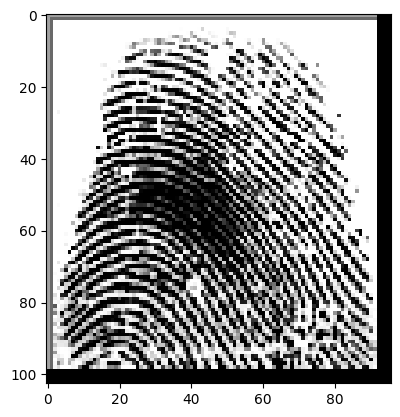

In [4]:
plt.imshow(fingerPrintSamples[0],cmap='gray')


IMAGE AFTER DOWNSAMPLING

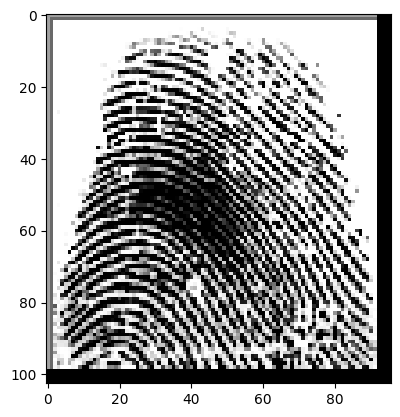

In [5]:
plt.imshow(downsample_image(fingerPrintSamples[0]),cmap="gray")

DOWNSAMPLING IMAGES AND CREATING IDS

In [6]:
# fingerPrintSamples = np.asarray(fingerPrintSamples)
fingerPrintSamples = np.array([downsample_image(ab) for ab in fingerPrintSamples])
ids = np.asarray(ids)
fingerPrintSamples = fingerPrintSamples[:,:,:,np.newaxis]
print("Shape of Data: " + str(fingerPrintSamples.shape))
print("Number of unique fingerPrintSamples : " + str(n_fingerPrintSamples))


# ids = to_categorical(ids)

fingerPrintSamples = fingerPrintSamples.astype('float32')
fingerPrintSamples /= 255.

Shape of Data: (470, 103, 96, 1)
Number of unique fingerPrintSamples : 50


CREATING TRAIN TEST SPLIT DATA 

In [7]:
x_train, x_test, y_train, y_test = train_test_split(fingerPrintSamples,ids, test_size = 0.2, random_state = 0)



INTRODUCING CHECKPOINTS FOR BETTER TRAINING

In [8]:
checkpoint = callbacks.ModelCheckpoint('./trained_model_checkpoints.h5',
                                           save_best_only=True, save_weights_only=True, verbose=1)

DEFINING THE MODEL

In [9]:
model = Sequential()
model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(103,96, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(51))
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


# soft max activation function

LAYERS INSIDE THE MODEL ARE :-

In [10]:
model.layers

DIAGRAM FOR THE LAYERS

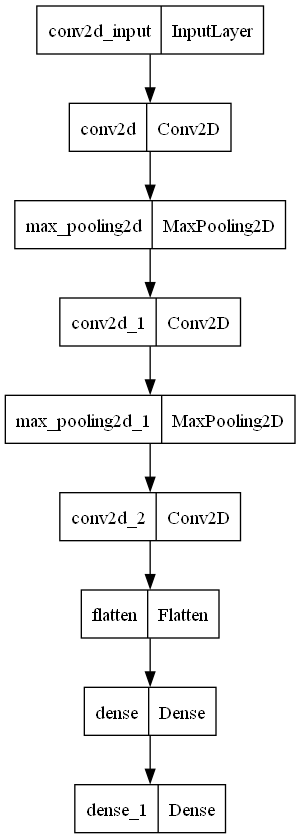

In [11]:
from keras.utils import plot_model

plot_model(model)

TRAINING THE MODEL 

In [12]:
model.fit(x_train, y_train,
             batch_size=32,
             epochs=10,
             validation_data=(x_test, y_test),
             shuffle=True,callbacks=[checkpoint])

             

Epoch 1/10
12/12 [==============================] - ETA: 0s - loss: 3.9531 - accuracy: 0.0239
Epoch 1: val_loss improved from inf to 3.93040, saving model to .\trained_model_checkpoints.h5
12/12 [==============================] - 6s 384ms/step - loss: 3.9531 - accuracy: 0.0239 - val_loss: 3.9304 - val_accuracy: 0.0106
Epoch 2/10
12/12 [==============================] - ETA: 0s - loss: 3.9232 - accuracy: 0.0213
Epoch 2: val_loss improved from 3.93040 to 3.91169, saving model to .\trained_model_checkpoints.h5
12/12 [==============================] - 4s 345ms/step - loss: 3.9232 - accuracy: 0.0213 - val_loss: 3.9117 - val_accuracy: 0.0106
Epoch 3/10
12/12 [==============================] - ETA: 0s - loss: 3.8746 - accuracy: 0.0612
Epoch 3: val_loss improved from 3.91169 to 3.85894, saving model to .\trained_model_checkpoints.h5
12/12 [==============================] - 4s 346ms/step - loss: 3.8746 - accuracy: 0.0612 - val_loss: 3.8589 - val_accuracy: 0.0106
Epoch 4/10
12/12 [==============

PREDICTIN ONE SINGLE FINGERPRINT

3/3 [==============================] - 0s 87ms/step
Real Client no =  22
Predicted Client no =  22


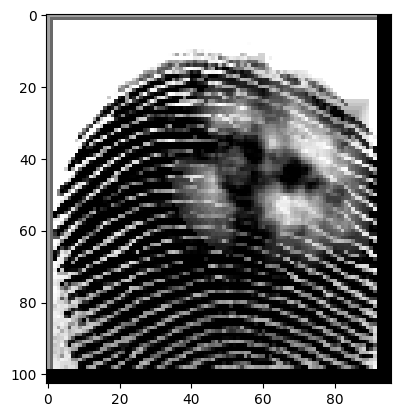

In [13]:
y_predicted = model.predict(x_test)
no=1
plt.imshow(x_test[no],cmap='gray')
print("Real Client no = ",y_test[no])
y_predicted_labels = [np.argmax(i) for i in y_predicted]
print("Predicted Client no = ",y_predicted_labels[no])


VISUALIZING THE MODEL ..........................................

CREATING DIFFERENT MODELS TO VISUALIZE THE OUTPUT OF EACH LAYERS 

In [14]:
from keras  import  Model 

model_layer_0_output  = Model(inputs=model.inputs , outputs=model.layers[0].output)
model_layer_1_output  = Model(inputs=model.inputs , outputs=model.layers[1].output)
model_layer_2_output  = Model(inputs=model.inputs , outputs=model.layers[2].output)
model_layer_3_output  = Model(inputs=model.inputs , outputs=model.layers[3].output)
model_layer_4_output  = Model(inputs=model.inputs , outputs=model.layers[4].output)
model_layer_5_output  = Model(inputs=model.inputs , outputs=model.layers[5].output)
model_layer_6_output  = Model(inputs=model.inputs , outputs=model.layers[6].output)
model_layer_7_output  = Model(inputs=model.inputs , outputs=model.layers[7].output)



x_test.shape

In [15]:
features1 = model_layer_0_output.predict(np.array([x_test[0]]))
features2 = model_layer_1_output.predict(np.array([x_test[0]]))
features3 = model_layer_2_output.predict(np.array([x_test[0]]))
features4 = model_layer_3_output.predict(np.array([x_test[0]]))
features5 = model_layer_4_output.predict(np.array([x_test[0]]))
features6 = model_layer_5_output.predict(np.array([x_test[0]]))
features7 = model_layer_6_output.predict(np.array([x_test[0]]))
features7 = model_layer_7_output.predict(np.array([x_test[0]]))

print(features1.shape)
print(features2.shape)
print(features3.shape)
print(features4.shape)
print(features5.shape)
print(features6.shape)
print(features7.shape)

1/1 [==============================] - 0s 109ms/step
(1, 101, 94, 64)
(1, 50, 47, 64)
(1, 48, 45, 64)
(1, 24, 22, 64)
(1, 22, 20, 64)
(1, 28160)
(1, 51)


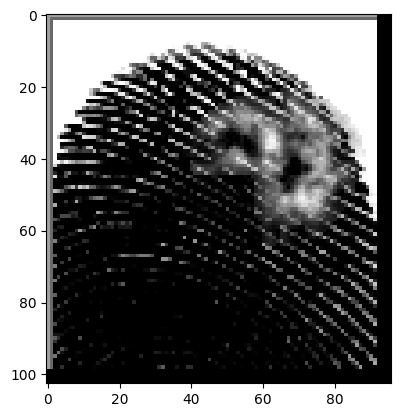

In [27]:
plt.imshow(x_test[0],cmap="gray")

FIRST LAYER OUTPUT

1/1 [==============================] - 0s 58ms/step


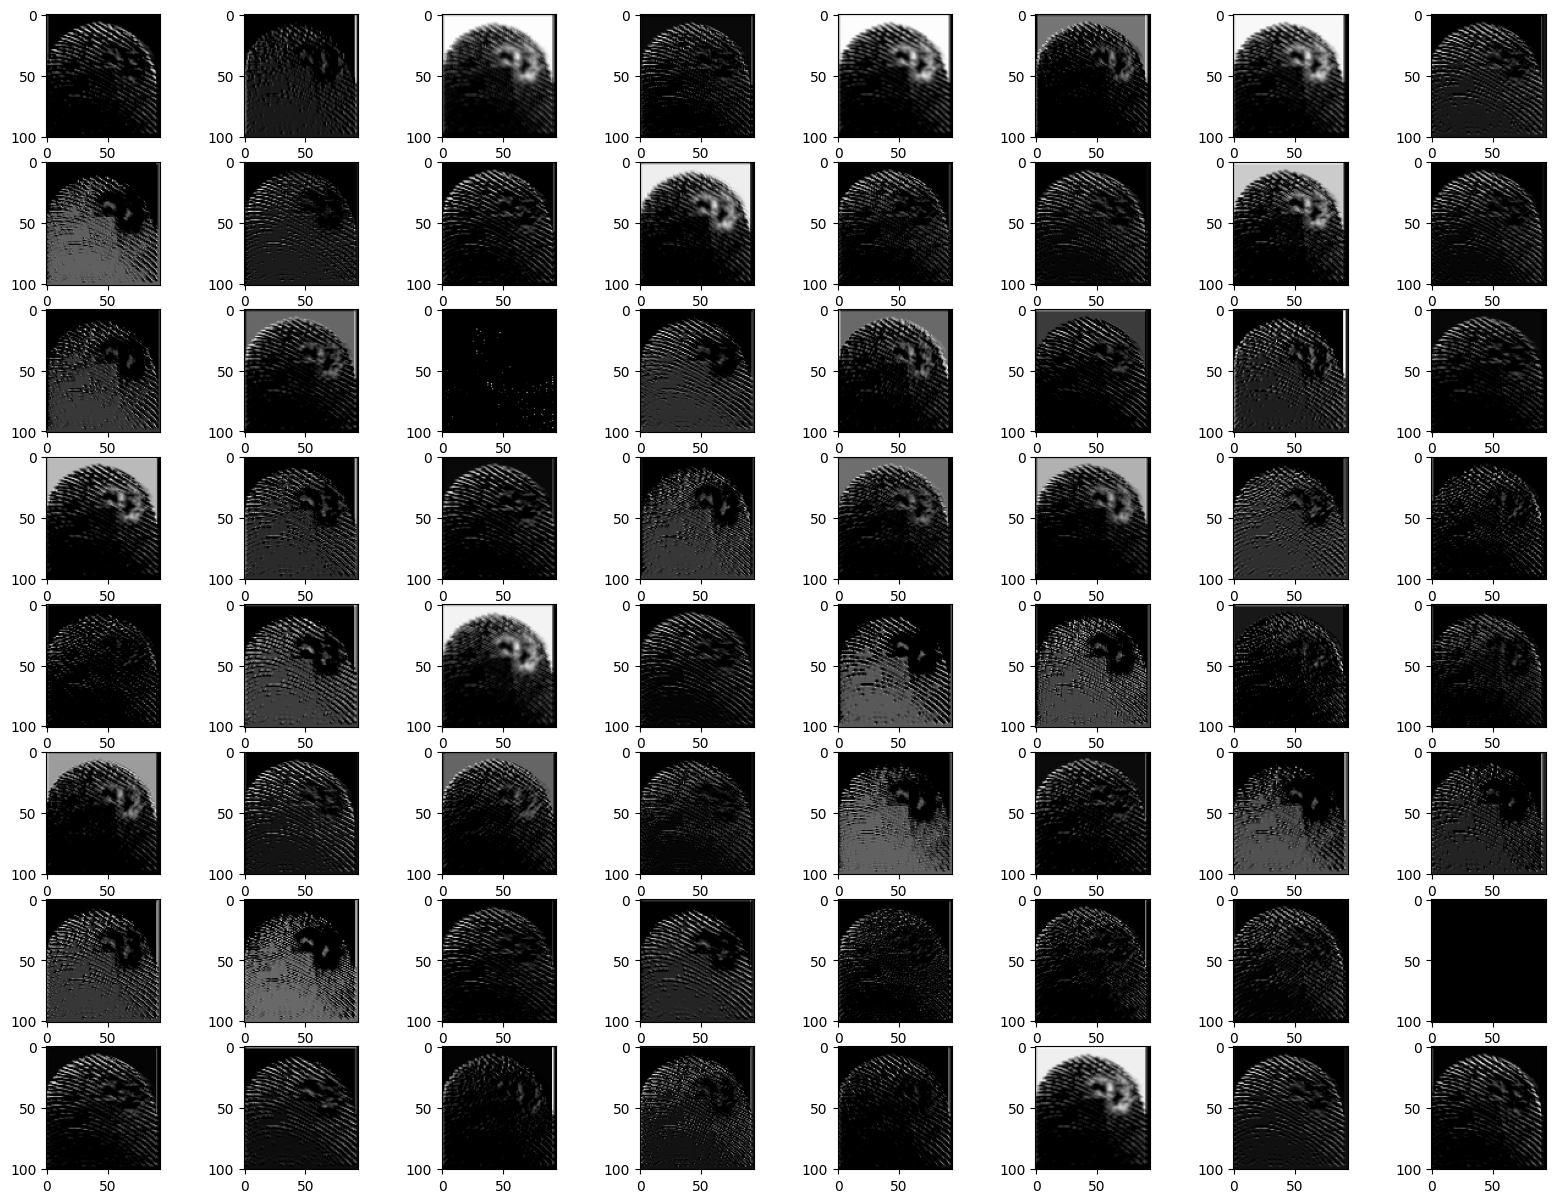

In [16]:
feature_0 = model_layer_0_output.predict(np.array([x_test[0]]))
fig = plt.figure(figsize=(20,15))
for i in range(1,feature_0.shape[3]+1):

    plt.subplot(8,8,i)
    plt.imshow(feature_0[0,:,:,i-1] , cmap='gray')

plt.show()

SECOND LAYER OUTPUTS

1/1 [==============================] - 0s 22ms/step


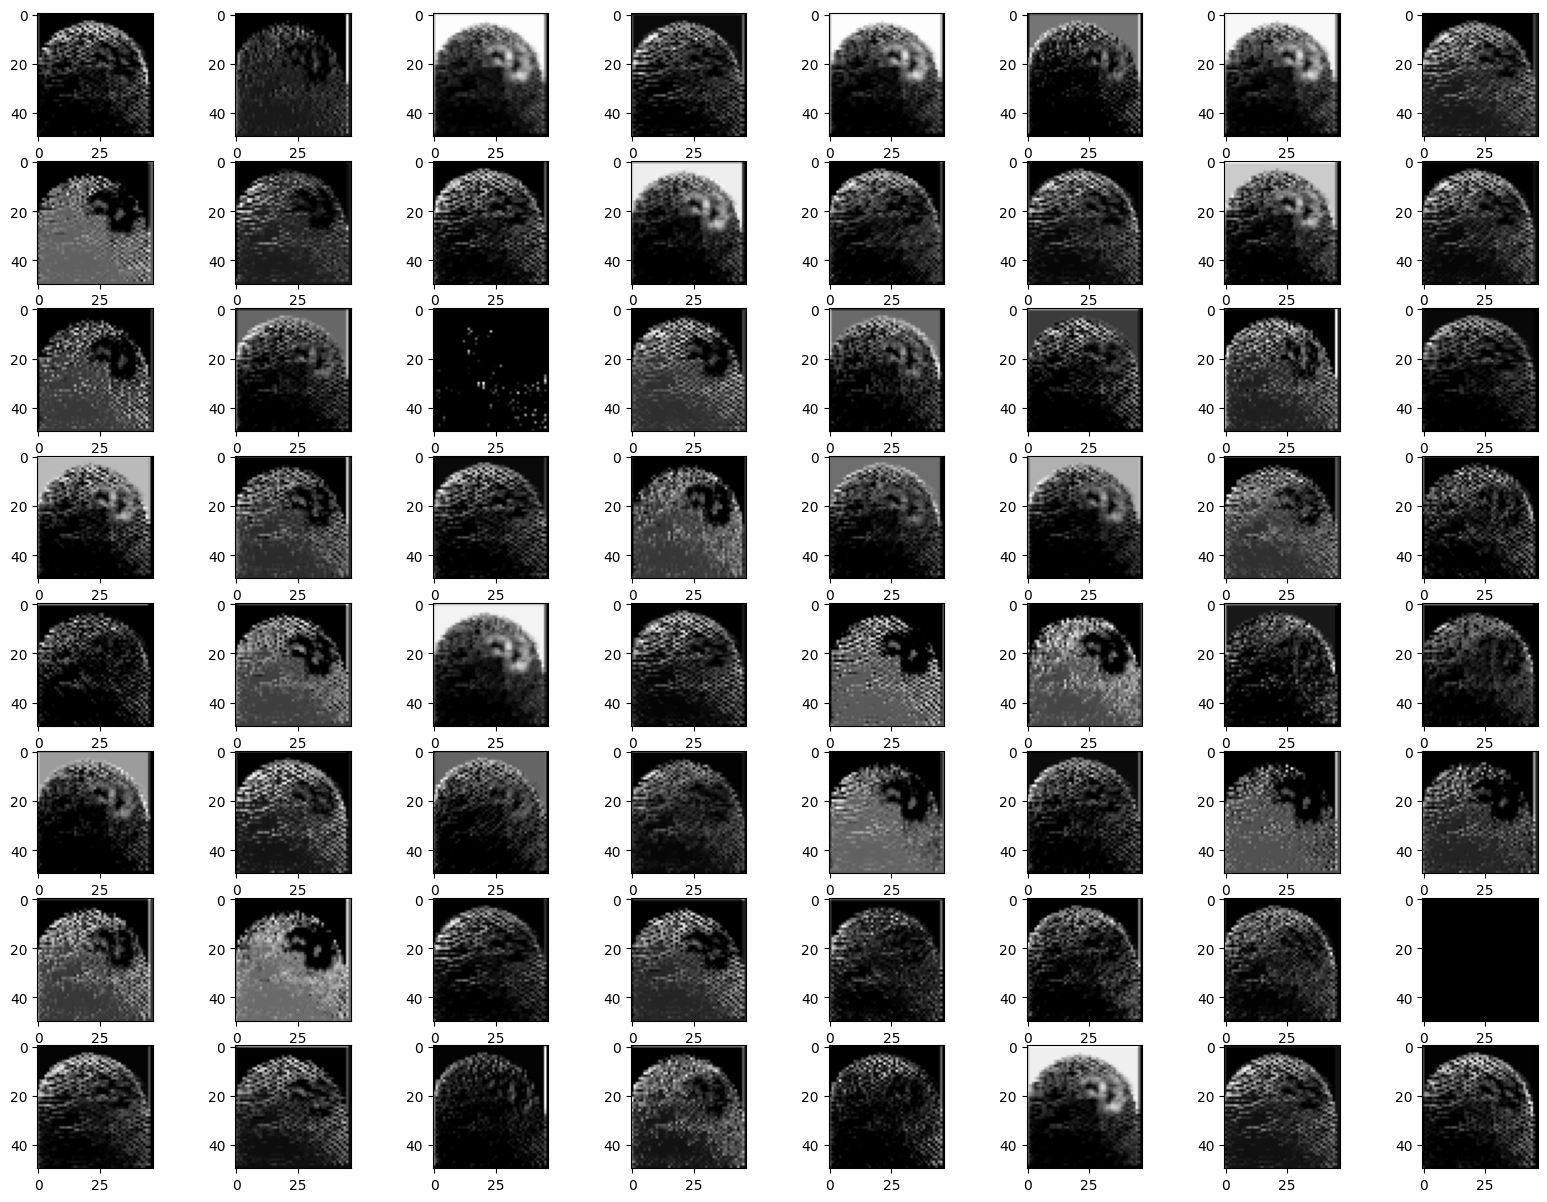

In [17]:
feature_1 = model_layer_1_output.predict(np.array([x_test[0]]))
fig = plt.figure(figsize=(20,15))
for i in range(1,feature_1.shape[3]+1):

    plt.subplot(8,8,i)
    plt.imshow(feature_1[0,:,:,i-1] , cmap='gray')

plt.show()

THIRD LAYER OUTPUTS

1/1 [==============================] - 0s 31ms/step


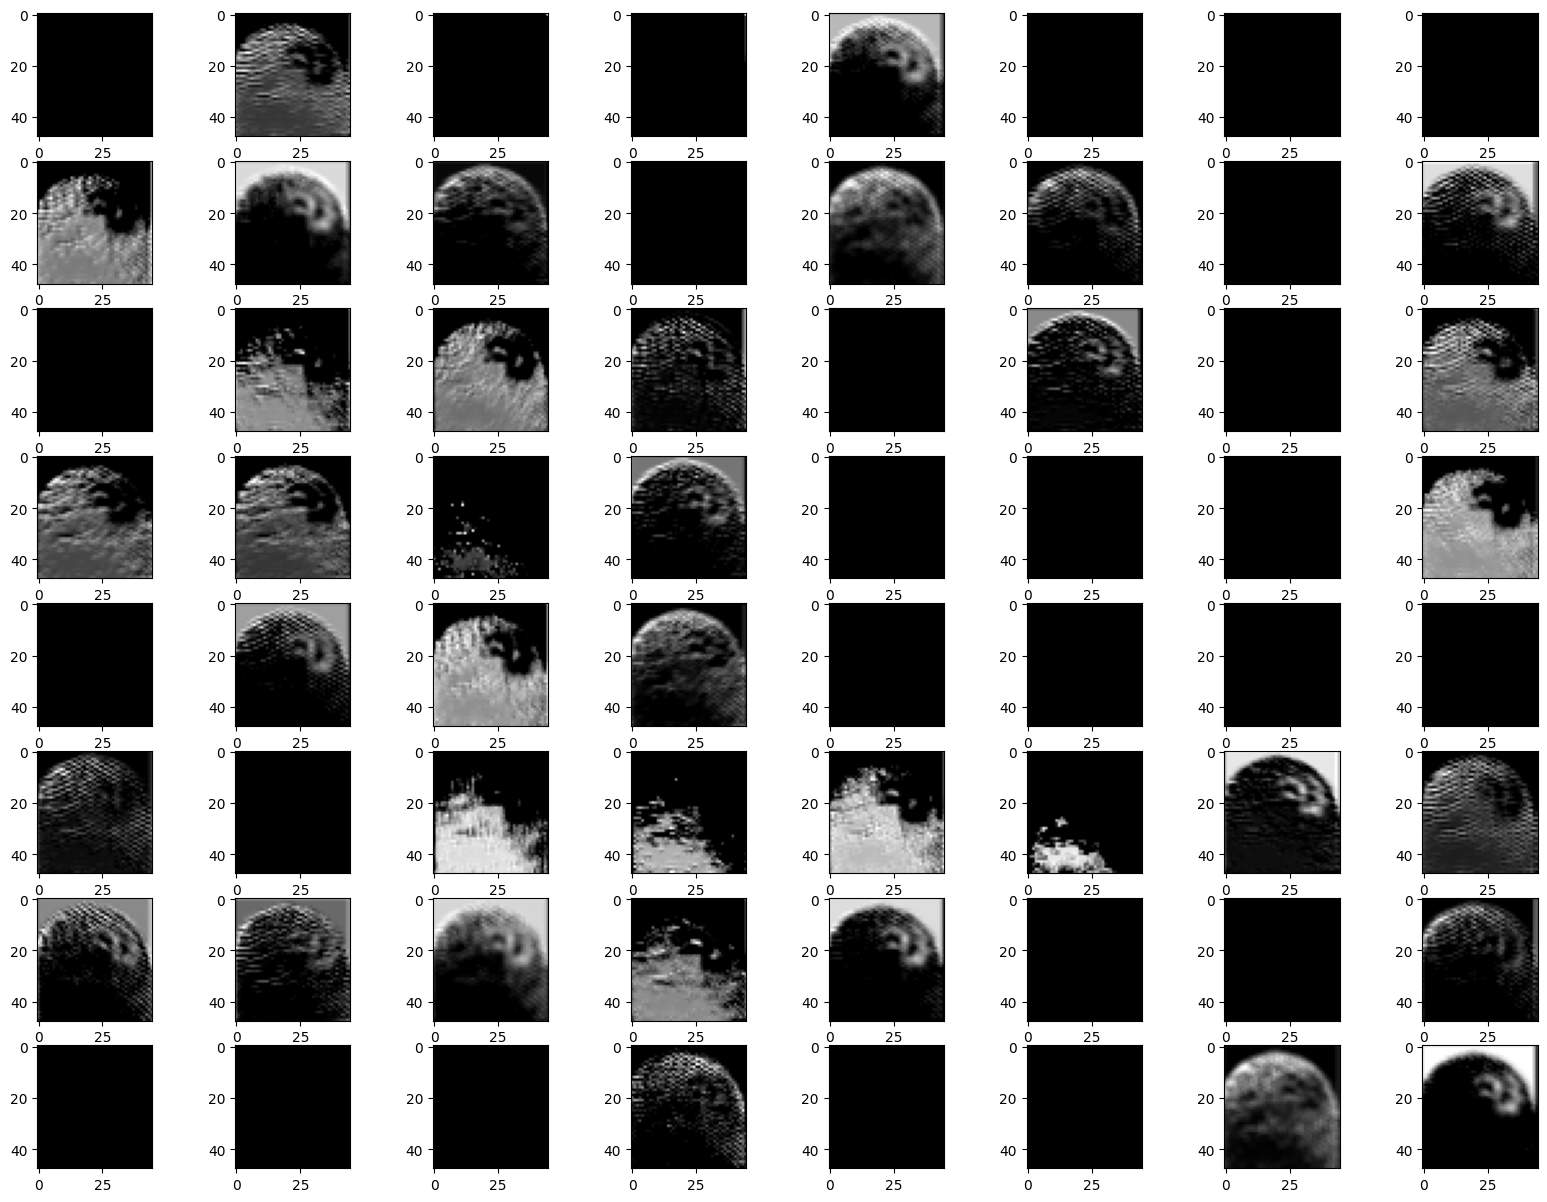

In [18]:
feature_2 =model_layer_2_output.predict(np.array([x_test[0]]))
fig = plt.figure(figsize=(20,15))
for i in range(1,feature_2.shape[3]+1):

    plt.subplot(8,8,i)
    plt.imshow(feature_2[0,:,:,i-1] , cmap='gray')

plt.show()


FOURTH LAYER OUTPUTS

1/1 [==============================] - 0s 27ms/step


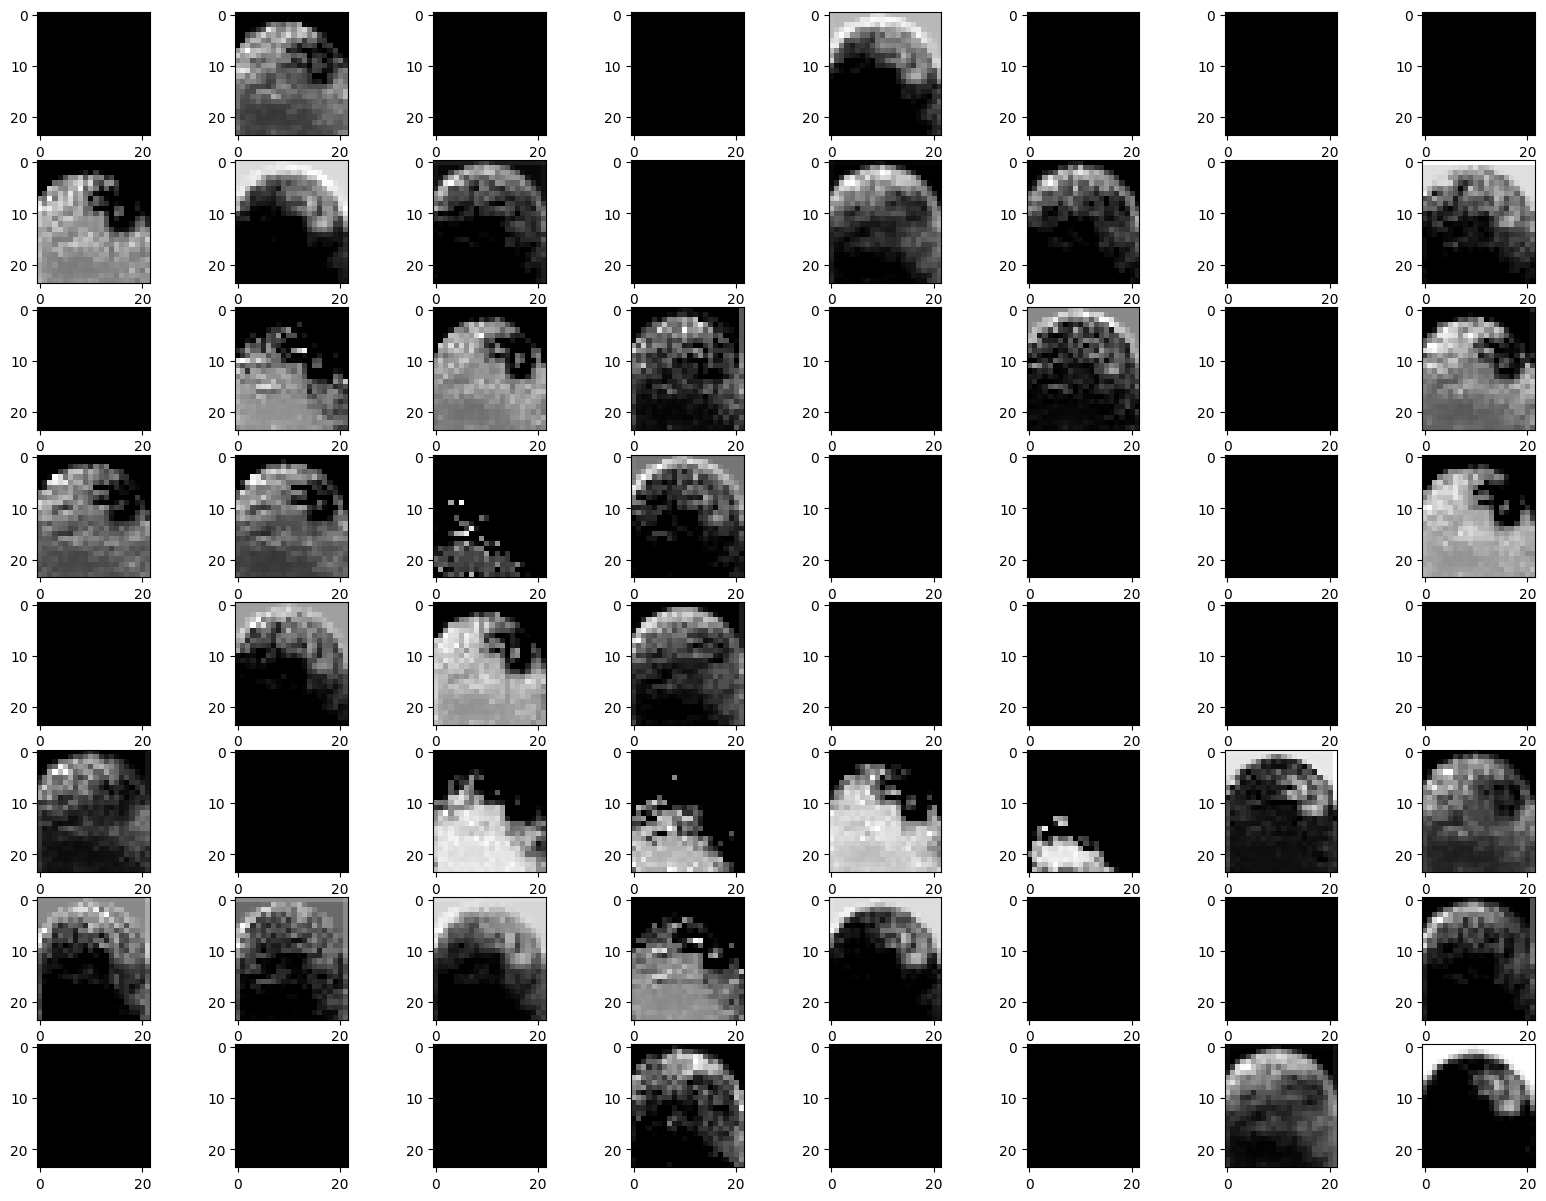

In [19]:
feature_3 = model_layer_3_output.predict(np.array([x_test[0]]))
fig = plt.figure(figsize=(20,15))
for i in range(1,feature_3.shape[3]+1):

    plt.subplot(8,8,i)
    plt.imshow(feature_3[0,:,:,i-1] , cmap='gray')

plt.show()

FIFTH LAYER OUTPUT

1/1 [==============================] - 0s 39ms/step


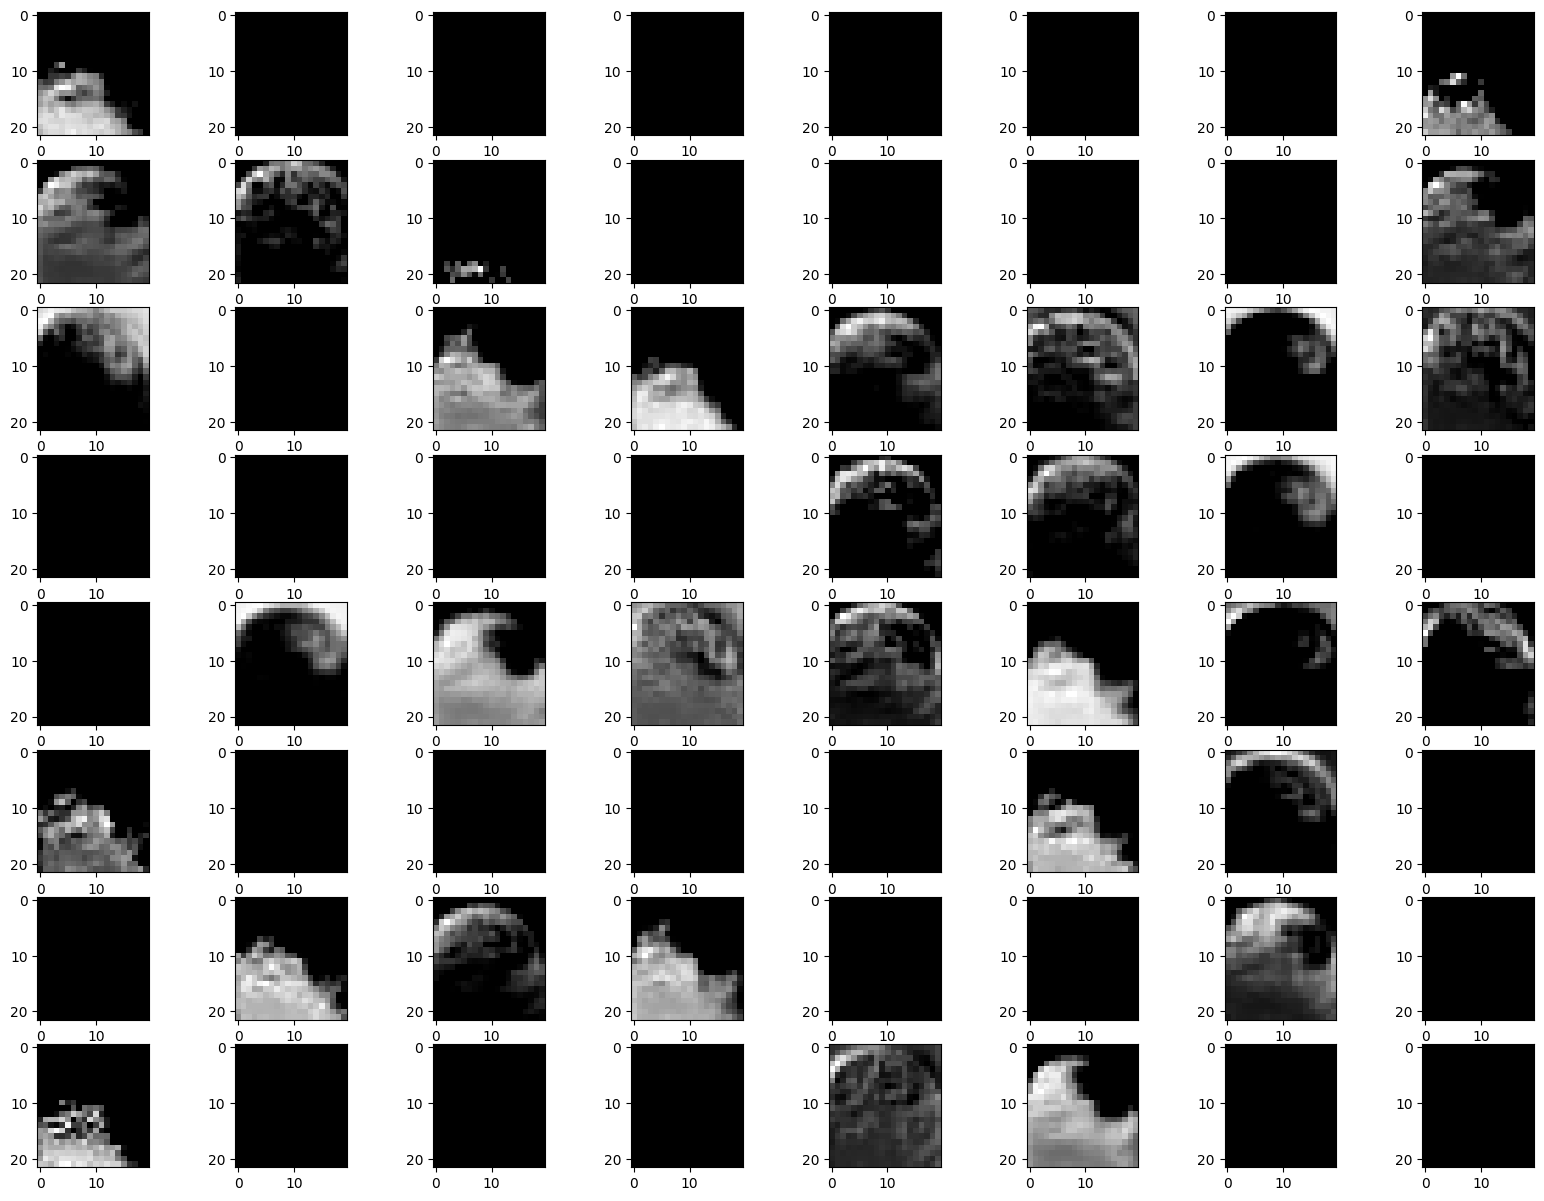

In [20]:
feature_4 = model_layer_4_output.predict(np.array([x_test[0]]))
fig = plt.figure(figsize=(20,15))
for i in range(1,feature_4.shape[3]+1):

    plt.subplot(8,8,i)
    plt.imshow(feature_4[0,:,:,i-1] , cmap='gray')

plt.show()


SIXTH LAYER OUTPUT

1/1 [==============================] - 0s 28ms/step
(1, 28160)


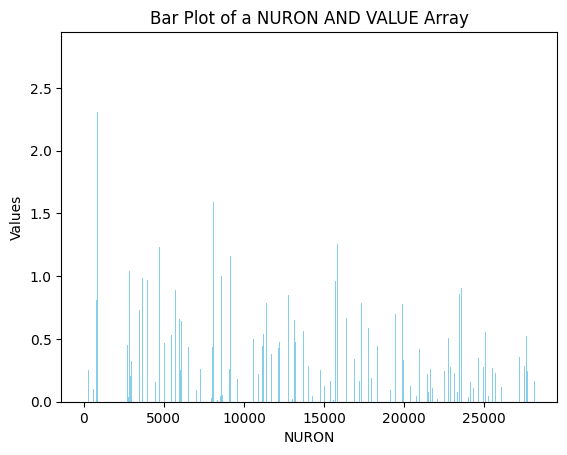

In [21]:
feature_5 = model_layer_5_output.predict(np.array([x_test[0]]))
print(feature_5.shape)

def visualize_array(data):
    plt.bar(np.arange(len(data)), data, color='skyblue')
    plt.xlabel('NURON')
    plt.ylabel('Values')
    plt.title('Bar Plot of a NURON AND VALUE Array')
    plt.show()

# Example usage:
array_data = feature_5[0]
visualize_array(array_data)

SEVENTH LAYER OUTPUT


1/1 [==============================] - 0s 35ms/step


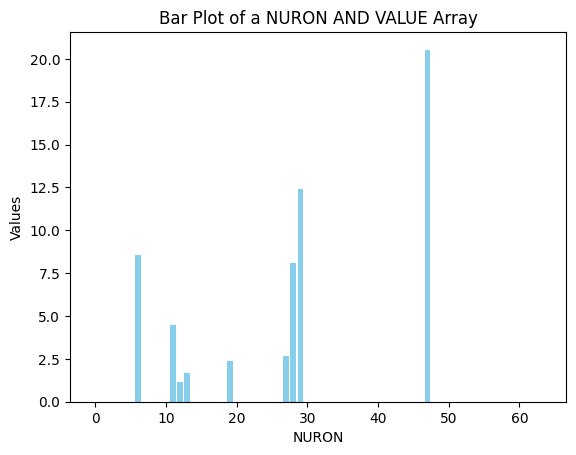

In [22]:
feature_6 =model_layer_6_output.predict(np.array([x_test[0]]))
array_datae = feature_6[0]
visualize_array(array_datae)

EIGHTH LAYER OUTPUT

1/1 [==============================] - 0s 35ms/step


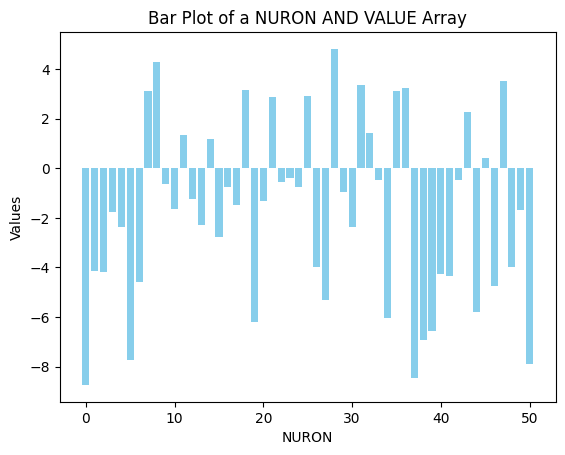

In [23]:
feature_7 = model_layer_7_output.predict(np.array([x_test[0]]))
array_datae = feature_7[0]
visualize_array(array_datae)


TESTING FOR UNIQUE FINGERPRINT 

1/1 [==============================] - 0s 51ms/step
35
5


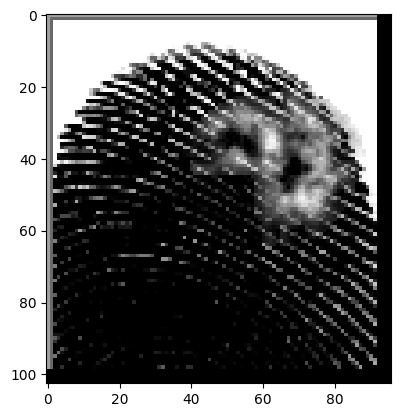

In [24]:
y_predicted = model.predict(np.array([x_test[3]]))
no=0
plt.imshow(x_test[no],cmap='gray')
print(y_test[no])
y_predicted_labels = [np.argmax(i) for i in y_predicted]
print(y_predicted_labels[no])

SAVING MODEL ..

In [25]:
#SAVE MODEL
model.save("model.h5") 

c:\Program Files\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


LOADING MODEL 

In [26]:
#LOAD MODEL 
loaded_model = load_model("model.h5") 